<a href="https://colab.research.google.com/github/Soohyun13/MID6/blob/soohyun/%ED%95%99%EC%83%9D_%EC%84%B1%EC%A0%81_%EB%B6%84%EC%84%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94_250317.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data 살펴보기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 속성 리스트
data_attributes = [
    [1, "gender", "학생의 성별", "범주형 ('Male', 'Female')"],
    [2, "NationalITy", "학생의 국적", "범주형 ('Kuwait', 'Lebanon', 'Egypt' 등)"],
    [3, "PlaceofBirth", "학생의 출생 국가", "범주형 ('Kuwait', 'Lebanon', 'Egypt' 등)"],
    [4, "StageID", "학생의 교육 단계", "범주형 ('LowerLevel', 'MiddleSchool', 'HighSchool')"],
    [5, "GradeID", "학생의 학년", "범주형 ('G-01' ~ 'G-12')"],
    [6, "SectionID", "학생의 반 ID", "범주형 ('A', 'B', 'C')"],
    [7, "Topic", "수업 과목", "범주형 ('English', 'Math', 'Science' 등)"],
    [8, "Semester", "학기 정보", "범주형 ('First', 'Second')"],
    [9, "Relation", "학생을 책임지는 부모", "범주형 ('Mom', 'Father')"],
    [10, "raisedhands", "수업 중 손을 든 횟수", "수치형 (0~100)"],
    [11, "VisITedResources", "학습 리소스 방문 횟수", "수치형 (0~100)"],
    [12, "AnnouncementsView", "공지사항 확인 횟수", "수치형 (0~100)"],
    [13, "Discussion", "토론 그룹 참여 횟수", "수치형 (0~100)"],
    [14, "ParentAnsweringSurvey", "부모 설문 조사 응답 여부", "범주형 ('Yes', 'No')"],
    [15, "ParentschoolSatisfaction", "부모의 학교 만족도", "범주형 ('Yes', 'No')"],
    [16, "StudentAbsenceDays", "학생의 결석 일수", "범주형 ('Above-7', 'Under-7')"]
]

# 데이터프레임 생성
df_attributes = pd.DataFrame(data_attributes, columns=["번호", "속성명", "설명", "데이터 유형"])

# 데이터 출력
from google.colab import data_table
data_table.DataTable(df_attributes, include_index=False)

,번호,속성명,설명,데이터 유형
0,1,gender,학생의 성별,"범주형 ('Male', 'Female')"
1,2,NationalITy,학생의 국적,"범주형 ('Kuwait', 'Lebanon', 'Egypt' 등)"
2,3,PlaceofBirth,학생의 출생 국가,"범주형 ('Kuwait', 'Lebanon', 'Egypt' 등)"
3,4,StageID,학생의 교육 단계,"범주형 ('LowerLevel', 'MiddleSchool', 'HighSchool')"
4,5,GradeID,학생의 학년,범주형 ('G-01' ~ 'G-12')
5,6,SectionID,학생의 반 ID,"범주형 ('A', 'B', 'C')"
6,7,Topic,수업 과목,"범주형 ('English', 'Math', 'Science' 등)"
7,8,Semester,학기 정보,"범주형 ('First', 'Second')"
8,9,Relation,학생을 책임지는 부모,"범주형 ('Mom', 'Father')"
9,10,raisedhands,수업 중 손을 든 횟수,수치형 (0~100)


### Data 불러오기

In [ ]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [ ]:
# 데이터 형태 확인 : 480 row, 17 col
df.shape

(480, 17)

In [ ]:
# 데이터 type 확인 : 수치형 / 범주형 데이터 혼재, null값 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.isna().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


In [ ]:
# Outlier, 음수값 확인
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
# df 중 int 타입인 column을 따로 빼주기

df_numeric = df.select_dtypes(include=['number'])
df_numeric.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


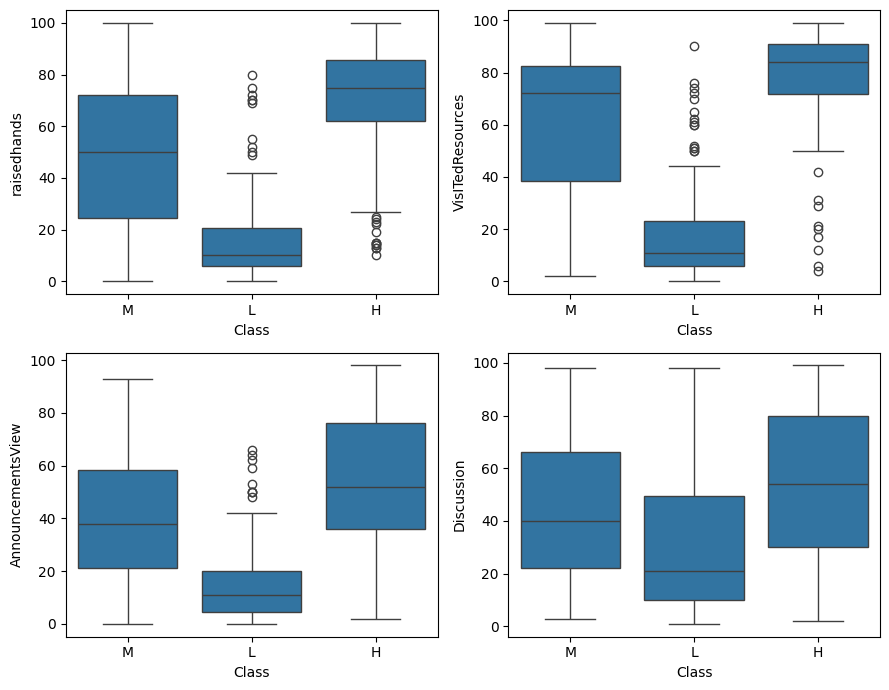

In [ ]:
# 수치형 데이터의 class별 boxplot 그리기
fig, axes = plt.subplots(2, 2, figsize=(9, 7))

# raisedhands
sns.boxplot(x='Class', y='raisedhands', data=df, ax=axes[0, 0])

# VisITedResources
sns.boxplot(x='Class', y='VisITedResources', data=df, ax=axes[0, 1])

# AnnouncementsView
sns.boxplot(x='Class', y='AnnouncementsView', data=df, ax=axes[1, 0])

# Discussion
sns.boxplot(x='Class', y='Discussion', data=df, ax=axes[1, 1])

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
# 'Class' 칼럼을 숫자로 변형한 'Class_numeric' 칼럼 추가 -> 추후 사용 예정!
df['Class_numeric'] = df['Class'].map({'H': 1, 'M': 2, 'L': 3}) # 높은 등급이 1등급!

- 데이터 탐색 결과
  - 결측치(NULL값) 없음
  - 이상치 없음
  - 머신러닝을 위한 데이터셋이 아니기 때문에, 일단 원핫인코딩 등 범주형 데이터를 바꾸는 것과 정규화 / 표준화 등은 보류.

In [ ]:
# 정규성 검정 수행
stat, p_value = shapiro(df['Class_numeric'].dropna())

# 결과 반환
{
    "Shapiro-Wilk statistic": stat,
    "p-value": p_value
}

{'Shapiro-Wilk statistic': np.float64(0.80885789888382),
 'p-value': np.float64(2.042792858074477e-23)}

- p-value < 0.05 → 데이터가 정규성을 따르지 않음
- 즉, 현재 데이터(Class_numeric)는 정규분포를 따르지 않으므로, t-검정이나 ANOVA를 사용할 수 없음.
- 데이터를 통계적으로 검정하고자 할 때, 비모수 검정(Mann-Whitney U 검정, Kruskal-Wallis 검정)만 사용 가능.

## 가설 입증을 위한 시각화

### 1. 국가와 성적

In [ ]:
# 어떤 국가의 데이터가 있는지 확인
df['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [ ]:
df['NationalITy'].nunique()

14

In [ ]:
# 국가 그룹화 : 북아프리카 / 중동 / 기타 지역 구분

import folium

# 지역별 국가 그룹화
region_colors = {
    "북아프리카": "red",
    "중동": "blue",
    "기타": "green"
}

# 국가별 위치 데이터
country_locations = {
    "KW": [29.3759, 47.9774],  # 쿠웨이트 (중동)
    "lebanon": [33.8547, 35.8623],  # 레바논 (중동)
    "Egypt": [26.8206, 30.8025],  # 이집트 (북아프리카)
    "SaudiArabia": [23.8859, 45.0792],  # 사우디아라비아 (중동)
    "USA": [37.0902, -95.7129],  # 미국 (기타)
    "Jordan": [30.5852, 36.2384],  # 요르단 (중동)
    "venzuela": [6.4238, -66.5897],  # 베네수엘라 (기타)
    "Iran": [32.4279, 53.6880],  # 이란 (중동)
    "Tunis": [33.8869, 9.5375],  # 튀니지 (북아프리카)
    "Morocco": [31.7917, -7.0926],  # 모로코 (북아프리카)
    "Syria": [34.8021, 38.9968],  # 시리아 (중동)
    "Palestine": [31.9522, 35.2332],  # 팔레스타인 (중동)
    "Iraq": [33.3152, 44.3661],  # 이라크 (중동)
    "Lybia": [26.3351, 17.2283]  # 리비아 (북아프리카)
}

# 지역 분류
country_regions = {
    "KW": "중동",
    "lebanon": "중동",
    "Egypt": "북아프리카",
    "SaudiArabia": "중동",
    "USA": "기타",
    "Jordan": "중동",
    "venzuela": "기타",
    "Iran": "중동",
    "Tunis": "북아프리카",
    "Morocco": "북아프리카",
    "Syria": "중동",
    "Palestine": "중동",
    "Iraq": "중동",
    "Lybia": "북아프리카"
}

# 지도 생성
world_map = folium.Map(location=[25, 25], zoom_start=3)

# 각 나라별 마커 추가
for country, coords in country_locations.items():
    region = country_regions[country]  # 해당 국가의 지역
    color = region_colors[region]  # 지역에 따른 색상 지정

    folium.Marker(
        location=coords,
        popup=f"{country} ({region})",  # 마커 클릭 시 국가명 & 지역 표시
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(world_map)

# 지도 출력
world_map

In [ ]:
df['NationalITy'].value_counts()

,count
NationalITy,
KW,179
Jordan,172
Palestine,28
Iraq,22
lebanon,17
Tunis,12
SaudiArabia,11
Egypt,9
Syria,7


In [ ]:
df.groupby(by='NationalITy')['Class'].value_counts()

NationalITy  Class
Egypt        M         4
             L         3
             H         2
Iran         M         4
             L         2
Iraq         H        14
             M         8
Jordan       M        82
             H        53
             L        37
KW           M        75
             L        68
             H        36
Lybia        L         6
Morocco      M         2
             H         1
             L         1
Palestine    M        16
             H        12
SaudiArabia  H         6
             M         4
             L         1
Syria        M         3
             H         2
             L         2
Tunis        M         5
             L         4
             H         3
USA          H         3
             M         2
             L         1
lebanon      H         9
             M         6
             L         2
venzuela     H         1
Name: count, dtype: int64

In [ ]:
# 성적 중 'L' 비율 확인하기
low_ratio = df.groupby(by='NationalITy')['Class'].apply(lambda x: (x == 'L').sum() / len(x) * 100)

# 결과 정렬 (내림차순)
low_ratio_sorted = low_ratio.sort_values(ascending=False)
low_ratio_sorted

,Class
NationalITy,
Lybia,100.000000
KW,37.988827
Iran,33.333333
Egypt,33.333333
Tunis,33.333333
Syria,28.571429
Morocco,25.000000
Jordan,21.511628
USA,16.666667


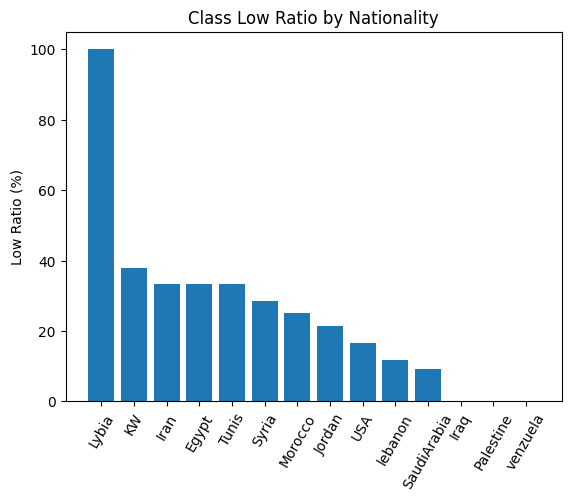

In [ ]:
# 시각화
plt.bar(low_ratio_sorted.index, low_ratio_sorted.values)
plt.title('Class Low Ratio by Nationality')
plt.ylabel('Low Ratio (%)')
plt.xticks(rotation=60)
plt.show()

- 국가별 'L' 성적 비율 확인
  - 리비아(100%) : 기록된 6개의 성적이 모두 L
  - 쿠웨이트, 이집트, 이란, 튀니지(30% 이상)
  - 시리아, 모로코, 요르단(20-30%)
  - 미국, 레바논(10-20%)
  - 사우디아라비아, 이라크, 팔레스타인, 베네수엘라(10% 미만)

#### 가설 1
----
중동 / 북아프리카 / 기타 지역으로 구분했을 때, 북아프리카 지역의 학생 평균 성적이 가장 낮을 것이다.

In [ ]:
# 지역 구분을 위한 'Location' 칼럼 추가
df['location'] = df['NationalITy'].map({
    'KW': 'MIDDLE EAST',
    'lebanon': 'MIDDLE EAST',
    'Egypt': 'NORTH AFRICA',
    'SaudiArabia': 'MIDDLE EAST',
    'USA': 'etc',
    'Jordan': 'MIDDLE EAST',
    'venzuela': 'etc',
    'Iran': 'MIDDLE EAST',
    'Tunis': 'NORTH AFRICA',
    'Morocco': 'NORTH AFRICA',
    'Syria': 'MIDDLE EAST',
    'Palestine': 'MIDDLE EAST',
    'Iraq': 'MIDDLE EAST',
    'Lybia': 'NORTH AFRICA'})

In [ ]:
# 구분된 지역별로 성적 중 'L' 비율 확인하기
low_ratio_location = df.groupby(by='location')['Class'].apply(lambda x: (x == 'L').sum() / len(x) * 100)

# 결과 정렬 (내림차순)
low_ratio_location_sorted = low_ratio_location.sort_values(ascending=False)
low_ratio_location_sorted

,Class
location,
NORTH AFRICA,45.161290
MIDDLE EAST,25.339367
etc,14.285714


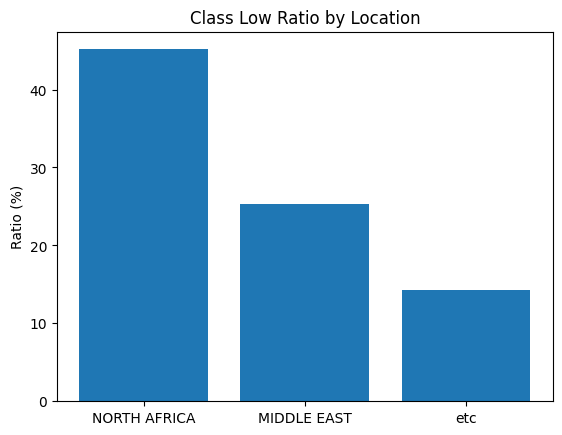

In [ ]:
# 시각화
plt.bar(low_ratio_location_sorted.index, low_ratio_location_sorted.values)
plt.title('Class Low Ratio by Location')
plt.ylabel('Ratio (%)')
plt.show()

- 지역 그룹별 'L' 성적 비율 확인
  - 북아프리카(45%)
  - 중동(25%)
  - 기타 지역(14%)

In [ ]:
# 구분된 지역별로 성적 중 'L', 'M' 합산 비율 확인하기
lm_ratio_location = df.groupby(by='location')['Class'].apply(lambda x: ((x == 'L').sum() + (x == 'M').sum()) / len(x) * 100)

# 결과 정렬 (내림차순)
lm_ratio_location_sorted = lm_ratio_location.sort_values(ascending=False)
lm_ratio_location_sorted

,Class
location,
NORTH AFRICA,80.645161
MIDDLE EAST,70.135747
etc,42.857143


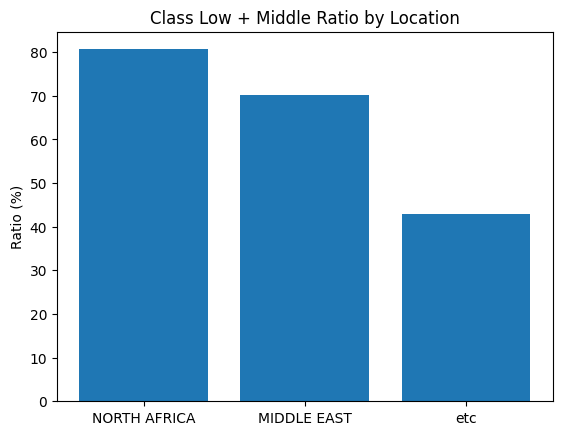

In [ ]:
# 시각화
plt.bar(lm_ratio_location_sorted.index, lm_ratio_location_sorted.values)
plt.title('Class Low + Middle Ratio by Location')
plt.ylabel('Ratio (%)')
plt.show()

- 지역 그룹별 'L' + 'M' 성적 비율 확인
  - 북아프리카(81%)
  - 중동(70%)
  - 기타 지역(43%)

In [ ]:
# 구분된 지역별로 성적 중 'H' 비율 확인하기
high_ratio_location = df.groupby(by='location')['Class'].apply(lambda x: (x == 'H').sum() / len(x) * 100)

# 결과 정렬 (오름차순)
high_ratio_location_sorted = high_ratio_location.sort_values()
high_ratio_location_sorted

,Class
location,
NORTH AFRICA,19.354839
MIDDLE EAST,29.864253
etc,57.142857


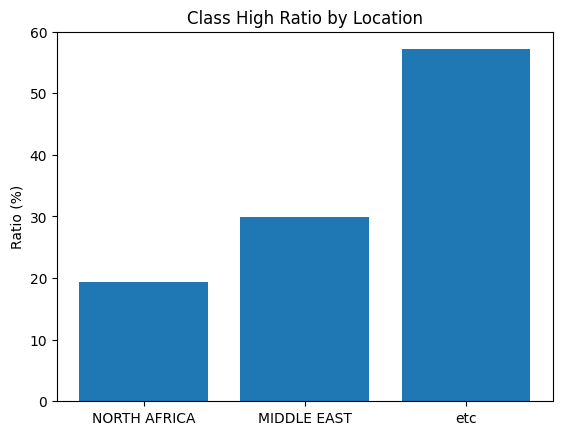

In [ ]:
# 시각화
plt.bar(high_ratio_location_sorted.index, high_ratio_location_sorted.values)
plt.title('Class High Ratio by Location')
plt.ylabel('Ratio (%)')
plt.show()

- 지역 그룹별 'H' 성적 비율 확인
  - 북아프리카(19%)
  - 중동(30%)
  - 기타 지역(57%)

In [ ]:
import pandas as pd
import scipy.stats as stats

# 지역(location)별 성적 분포 (범주형)
contingency_table = pd.crosstab(df['location'], df['Class'])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 결과:")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과:
Chi-Square Test Statistic: 8.559031976678016
p-value: 0.07311793717777568


- 귀무가설(H₀):
"중동(Middle East), 북아프리카(North Africa), 기타(etc) 지역 간 학생 성적 평균에는 차이가 없다."
- 대립가설(H₁):
"지역별 학생 성적 평균에 유의미한 차이가 있다."
- p-value = 0.0348 (< 0.05) → 귀무가설을 기각할 수 있음.
- 즉, 지역별로 학생 성적의 평균에 유의미한 차이가 존재함!

In [ ]:
# 지역(location)별 성적 평균 비교
location_means = df.groupby('location')['Class_numeric'].mean()
location_means.sort_values(ascending=False)

,Class_numeric
location,
NORTH AFRICA,2.258065
MIDDLE EAST,1.954751
etc,1.571429


##### 결론
----
가설 1: 중동 / 북아프리카 / 기타 지역으로 구분했을 때, 북아프리카 지역의 학생 평균 성적이 가장 낮을 것이다. => **TRUE**

#### 가설 2
----
아랍권 / 비아랍권 국가로 나누었을 때, 비아랍권 국가의 학생 평균 성적이 더 높을 것이다.

In [ ]:
# 국가 그룹화 : 아랍권 / 비아랍권 구분

import folium

# 🟢 아랍권: 초록색 / 🔴 비아랍권: 빨간색
region_colors = {
    "아랍권": "green",
    "비아랍권": "red"
}

# 국가별 위경도 데이터
country_locations = {
    "KW": [29.3759, 47.9774],  # 쿠웨이트 (아랍권)
    "lebanon": [33.8547, 35.8623],  # 레바논 (아랍권)
    "Egypt": [26.8206, 30.8025],  # 이집트 (아랍권)
    "SaudiArabia": [23.8859, 45.0792],  # 사우디아라비아 (아랍권)
    "USA": [37.0902, -95.7129],  # 미국 (비아랍권)
    "Jordan": [30.5852, 36.2384],  # 요르단 (아랍권)
    "venzuela": [6.4238, -66.5897],  # 베네수엘라 (비아랍권)
    "Iran": [32.4279, 53.6880],  # 이란 (비아랍권)
    "Tunis": [33.8869, 9.5375],  # 튀니지 (아랍권)
    "Morocco": [31.7917, -7.0926],  # 모로코 (아랍권)
    "Syria": [34.8021, 38.9968],  # 시리아 (아랍권)
    "Palestine": [31.9522, 35.2332],  # 팔레스타인 (아랍권)
    "Iraq": [33.3152, 44.3661],  # 이라크 (아랍권)
    "Lybia": [26.3351, 17.2283]  # 리비아 (아랍권)
}

# 국가별 아랍권 여부
country_regions = {
    "KW": "아랍권",
    "lebanon": "아랍권",
    "Egypt": "아랍권",
    "SaudiArabia": "아랍권",
    "USA": "비아랍권",
    "Jordan": "아랍권",
    "venzuela": "비아랍권",
    "Iran": "비아랍권",
    "Tunis": "아랍권",
    "Morocco": "아랍권",
    "Syria": "아랍권",
    "Palestine": "아랍권",
    "Iraq": "아랍권",
    "Lybia": "아랍권"
}

# 지도 생성 (기본 중심 좌표 설정)
world_map = folium.Map(location=[25, 25], zoom_start=3)

# 각 나라별 마커 추가
for country, coords in country_locations.items():
    region = country_regions[country]  # 해당 국가의 아랍권 여부
    color = region_colors[region]  # 색상 지정

    folium.Marker(
        location=coords,
        popup=f"{country} ({region})",  # 마커 클릭 시 국가명 & 구분 표시
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(world_map)

# 지도 출력
world_map

In [ ]:
# 아랍권 / 비아랍권 구분을 위한 칼럼 'Arab' 추가
df['Arab'] = df['NationalITy'].map({
    'KW': 'Arab world',
    'lebanon': 'Arab world',
    'Egypt': 'Arab world',
    'SaudiArabia': 'Arab world',
    'USA': 'non-Arab',
    'Jordan': 'Arab world',
    'venzuela': 'non-Arab',
    'Iran': 'non-Arab',
    'Tunis': 'Arab world',
    'Morocco': 'Arab world',
    'Syria': 'Arab world',
    'Palestine': 'Arab world',
    'Iraq': 'Arab world',
    'Lybia': 'Arab world'})

In [ ]:
# 아랍권 / 비아랍권 각 성적의 'L' 비율 확인하기
low_ratio_arab = df.groupby(by='Arab')['Class'].apply(lambda x: (x == 'L').sum() / len(x) * 100)

# 결과 정렬 (내림차순)
low_ratio_arab_sorted = low_ratio_arab.sort_values(ascending=False)
low_ratio_arab_sorted

,Class
Arab,
Arab world,26.552463
non-Arab,23.076923


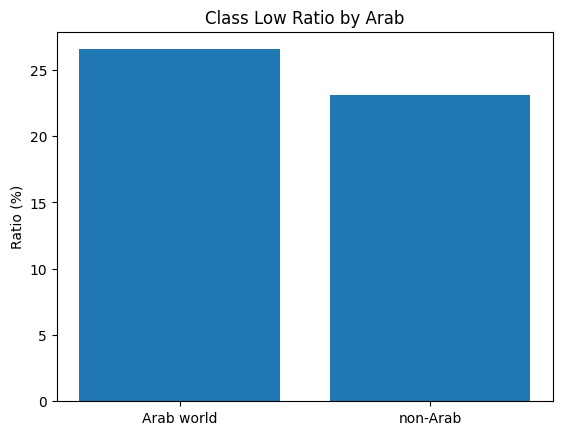

In [ ]:
# 시각화
plt.bar(low_ratio_arab_sorted.index, low_ratio_arab_sorted.values)
plt.title('Class Low Ratio by Arab')
plt.ylabel('Ratio (%)')
plt.show()

- 문화권별 'L' 성적 비율 확인
  - 아랍권(27%)
  - 비아랍권(23%)

In [ ]:
# 아랍권 / 비아랍권 각 성적의 'L', 'M' 합산 비율 확인하기
lm_ratio_location_arab = df.groupby(by='Arab')['Class'].apply(lambda x: ((x == 'L').sum() + (x == 'M').sum()) / len(x) * 100)

# 결과 정렬 (내림차순)
lm_ratio_location_arab_sorted = lm_ratio_location_arab.sort_values(ascending=False)
lm_ratio_location_arab_sorted

,Class
Arab,
Arab world,70.449679
non-Arab,69.230769


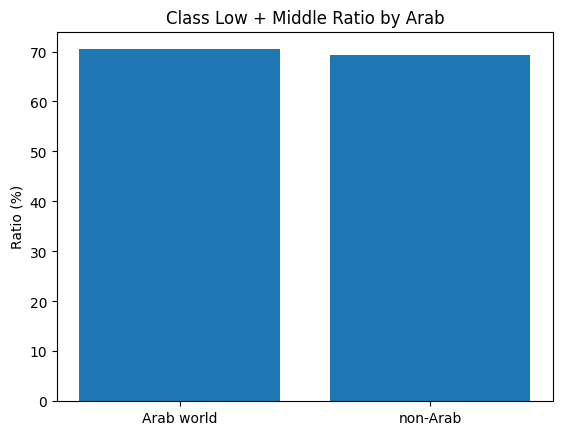

In [ ]:
# 시각화
plt.bar(lm_ratio_location_arab.index, lm_ratio_location_arab.values)
plt.title('Class Low + Middle Ratio by Arab')
plt.ylabel('Ratio (%)')
plt.show()

- 문화권별 'L' + 'M' 성적 합산 비율 확인
  - 아랍권(70%)
  - 비아랍권(69%)

In [ ]:
# 아랍권 / 비아랍권 각 성적의 'H' 비율 확인하기
high_ratio_arab = df.groupby(by='Arab')['Class'].apply(lambda x: (x == 'H').sum() / len(x) * 100)

# 결과 정렬 (내림차순)
high_ratio_arab_sorted = high_ratio_arab.sort_values()
high_ratio_arab_sorted

,Class
Arab,
Arab world,29.550321
non-Arab,30.769231


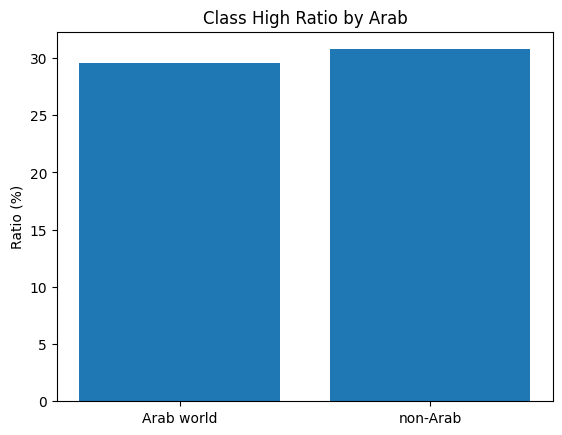

In [ ]:
# 시각화
plt.bar(high_ratio_arab_sorted.index, high_ratio_arab_sorted.values)
plt.title('Class High Ratio by Arab')
plt.ylabel('Ratio (%)')
plt.show()

- 문화권별 'H' 성적 합산 비율 확인
  - 아랍권(30%)
  - 비아랍권(31%)

In [ ]:
import scipy.stats as stats

# 아랍권 vs 비아랍권 성적 분포 (범주형)
contingency_table = pd.crosstab(df['Arab'], df['Class'])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 결과")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과
Chi-Square Test Statistic: 0.07874733026435037
p-value: 0.9613914035746767


- 귀무가설(H₀):
"아랍권(Arab world)과 비아랍권(non-Arab) 학생들의 평균 성적에는 유의미한 차이가 없다."
- 대립가설(H₁):
"비아랍권 학생들의 평균 성적이 더 높다."
- p-value = 0.8263 (> 0.05)
- 즉, 아랍권과 비아랍권 학생들의 성적 차이는 통계적으로 유의미하지 않음.
- 따라서 비아랍권 학생들이 평균적으로 더 높은 성적을 가진다는 가설을 통계적으로 뒷받침할 수 없음.

##### 결론
----
아랍권 / 비아랍권 국가로 나누었을 때, 비아랍권 국가의 학생 평균 성적이 더 높을 것이다. => **데이터셋을 시각화했을 때 TRUE인 것으로 보이나, 통계적으로 유의미하지 않다.**

#### 가설 3
----
중동 국가의 여학생보다 비중동 국가의 여학생 평균 성적이 더 높을 것이다.

In [ ]:
df['gender'].value_counts()

,count
gender,
M,305
F,175


In [ ]:
df.groupby('Arab')['gender'].value_counts()

Arab        gender
Arab world  M         297
            F         170
non-Arab    M           8
            F           5
Name: count, dtype: int64

In [ ]:
# Pivot Table : 비율 출력
table_ratio = pd.crosstab([df['Arab'], df['gender']], df['Class'], normalize='index') * 100
table_ratio = table_ratio.round(0)
table_ratio

Class                 H     L     M
Arab       gender                  
Arab world F       43.0  14.0  43.0
           M       22.0  34.0  44.0
non-Arab   F       40.0   0.0  60.0
           M       25.0  38.0  38.0

<Figure size 800x500 with 0 Axes>

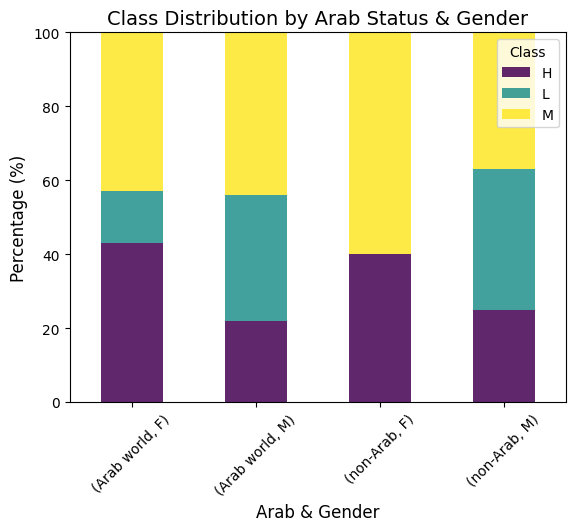

In [ ]:
# 시각화

# 그래프 크기 설정
plt.figure(figsize=(8, 5))

# 누적 막대 그래프 그리기
table_ratio.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.85)

# 그래프 제목 & 라벨 설정
plt.title("Class Distribution by Arab Status & Gender", fontsize=14)
plt.xlabel("Arab & Gender", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# 범례 추가
plt.legend(title="Class", loc='upper right')

# y축 범위 0~100% 설정
plt.ylim(0, 100)

# x축 라벨 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

In [ ]:
# Pivot Table : 학생 수 출력
pivot_df = df.pivot_table(index=['Arab', 'gender'], columns='Class', aggfunc='size', fill_value=0)
pivot_df

Class               H    L    M
Arab       gender              
Arab world F       73   24   73
           M       65  100  132
non-Arab   F        2    0    3
           M        2    3    3

In [ ]:
# 먼저 중동 국가 vs 비중동 국가의 성적 차이가 유의미한지 검정

from scipy.stats import mannwhitneyu

# 중동 vs 비중동 국가 성적 비교
middle_east_scores = df[df['location'] == 'Middle East']['Class_numeric'].dropna()
non_middle_east_scores = df[df['location'] != 'Middle East']['Class_numeric'].dropna()

# Mann-Whitney U 검정 실행
mann_whitney_result = mannwhitneyu(middle_east_scores, non_middle_east_scores, alternative='two-sided')

# 결과 출력
print("Step 1 - 중동 vs 비중동 국가 전체 성적 비교")
print("Mann-Whitney U test statistic:", mann_whitney_result.statistic)
print("p-value:", mann_whitney_result.pvalue)

Step 1 - 중동 vs 비중동 국가 전체 성적 비교
Mann-Whitney U test statistic: nan
p-value: nan


<ipython-input-61-77e452c86b43>:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  mann_whitney_result = mannwhitneyu(middle_east_scores, non_middle_east_scores, alternative='two-sided')


샘플 크기가 너무 작아서 검정 수행이 불가능함.
중동 / 비중동 국가의 여학생 성적을 비교하기 위해서는 먼저 중동 / 비중동 국가간의 성적 차이가 유의미한지 확인해야 하는데, 애초에 비중동 국가의 데이터가 너무 적음.

##### 결론
----
중동 국가의 여학생보다 비중동 국가의 여학생 평균 성적이 더 높을 것이다. => **결론내리기 어렵다.**
  - 중동 국가의 여학생에게서 'H' class 비율이 더 높게 나타나긴 했다.
  - 'L' class 비율도 중동 국가에서 더 높게 나타나긴 했으나, 애초에 비중동 국가의 데이터 수가 너무 적다.

#### 가설 4(포함 X)
----
전쟁을 겪고 있는 국가의 학생 평균 성적이 아닌 국가에 비해 더 낮을 것이다.

In [ ]:
# 불안정한 국가 구분을 위한 'War' 칼럼 추가
df['War'] = df['NationalITy'].map({
    'KW': 'peaceful',
    'lebanon': 'During the war',
    'Egypt': 'peaceful',
    'SaudiArabia': 'peaceful',
    'USA': 'peaceful',
    'Jordan': 'peaceful',
    'venzuela': 'peaceful',
    'Iran': 'peaceful',
    'Tunis': 'peaceful',
    'Morocco': 'peaceful',
    'Syria': 'During the war',
    'Palestine': 'During the war',
    'Iraq': 'During the war',
    'Lybia': 'During the war'})

In [ ]:
df['War'].value_counts()

,count
War,
peaceful,400
During the war,80


In [ ]:
df.groupby('War')['Class'].value_counts()

War             Class
During the war  H         37
                M         33
                L         10
peaceful        M        178
                L        117
                H        105
Name: count, dtype: int64

In [ ]:
# 안정 / 불안정 국가 구분별 각 성적의 'L' 비율 확인하기
low_ratio_war = df.groupby(by='War')['Class'].apply(lambda x: (x == 'L').sum() / len(x) * 100)

# 결과 정렬 (내림차순)
low_ratio_war_sorted = low_ratio_war.sort_values(ascending=False)
low_ratio_war_sorted

,Class
War,
peaceful,29.25
During the war,12.50


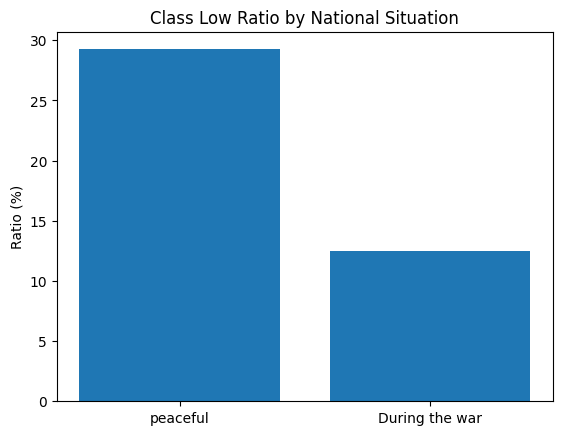

In [ ]:
# 시각화
plt.bar(low_ratio_war_sorted.index, low_ratio_war_sorted.values)
plt.title('Class Low Ratio by National Situation')
plt.ylabel('Ratio (%)')
plt.show()

In [ ]:
# 안정 / 불안정 국가 구분별 각 성적의 'L' + 'M' 합산 비율 확인하기
lm_ratio_war = df.groupby(by='War')['Class'].apply(lambda x: ((x == 'L').sum() + (x == 'M').sum()) / len(x) * 100)

# 결과 정렬 (내림차순)
lm_ratio__war_sorted = lm_ratio_war.sort_values(ascending=False)
lm_ratio__war_sorted

,Class
War,
peaceful,73.75
During the war,53.75


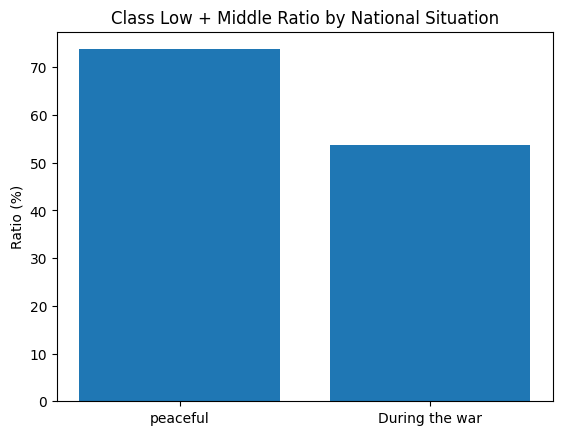

In [ ]:
# 시각화
plt.bar(lm_ratio__war_sorted.index, lm_ratio__war_sorted.values)
plt.title('Class Low + Middle Ratio by National Situation')
plt.ylabel('Ratio (%)')
plt.show()

In [ ]:
# 안정 / 불안정 국가 구분별 각 성적의 'H' 비율 확인하기
high_ratio_war = df.groupby(by='War')['Class'].apply(lambda x: (x == 'H').sum() / len(x) * 100)

# 결과 정렬 (내림차순)
high_ratio_war_sorted = high_ratio_war.sort_values()
high_ratio_war_sorted

,Class
War,
peaceful,26.25
During the war,46.25


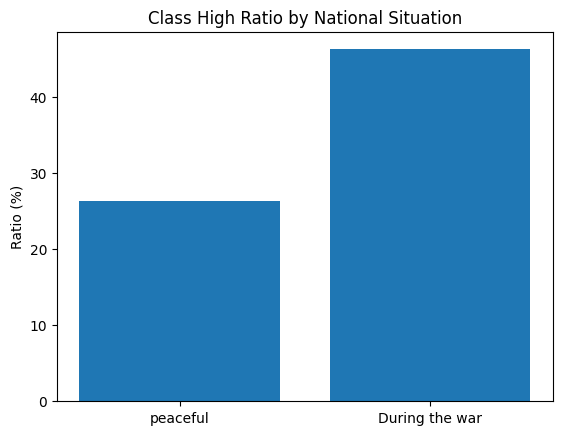

In [ ]:
# 시각화
plt.bar(high_ratio_war_sorted.index, high_ratio_war_sorted.values)
plt.title('Class High Ratio by National Situation')
plt.ylabel('Ratio (%)')
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# 전쟁 국가 vs 비전쟁 국가 성적 비교
war_scores = df[df['War'] == 'During the war']['Class_numeric'].dropna()
peaceful_scores = df[df['War'] == 'peaceful']['Class_numeric'].dropna()

# 샘플 크기 확인
print("전쟁 국가 학생 수:", len(war_scores))
print("비전쟁 국가 학생 수:", len(peaceful_scores))

# Mann-Whitney U 검정 실행
mann_whitney_result = mannwhitneyu(war_scores, peaceful_scores, alternative='two-sided')

# 결과 출력
print("Mann-Whitney U test statistic:", mann_whitney_result.statistic)
print("p-value:", mann_whitney_result.pvalue)

전쟁 국가 학생 수: 80
비전쟁 국가 학생 수: 400
Mann-Whitney U test statistic: 11759.5
p-value: 6.0144146858079116e-05


- p-value < 0.05 이므로 귀무가설을 기각할 수 있음!
- 즉, 전쟁 국가와 비전쟁 국가 학생들의 성적에는 유의미한 차이가 존재함!

##### 결론
----
전쟁을 겪고 있는 국가의 학생 평균 성적이 아닌 국가에 비해 더 낮을 것이다. => False


### 2. 과목과 성적

In [ ]:
# 어떤 과목이 있는지 확인
df['Topic'].unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

In [ ]:
df['Topic'].nunique()

12

In [ ]:
# 과목 데이터 분류
data = {
    '인문계열' : ['Arabic', 'English', 'Spanish', 'French', 'History', 'Quran'],
    '자연/공학계열' : ['Math', 'IT', 'Science', 'Biology', 'Chemistry', 'Geology']
}

df_subjects = pd.DataFrame(data)
df_subjects

,인문계열,자연/공학계열
0,Arabic,Math
1,English,IT
2,Spanish,Science
3,French,Biology
4,History,Chemistry
5,Quran,Geology


#### 가설 1
----
인문계열 과목의 경우, 여학생의 평균 성적이 남학생보다 더 높을 것이다.

In [ ]:
# 과목별 분류를 위한 'Subject_classification' 칼럼 추가
df['Subject_classification'] = df['Topic'].map({
    'Arabic': 'Liberal Arts',
    'English': 'Liberal Arts',
    'Spanish': 'Liberal Arts',
    'French': 'Liberal Arts',
    'History': 'Liberal Arts',
    'Quran': 'Liberal Arts',
    'Math': 'Science',
    'IT': 'Science',
    'Science': 'Science',
    'Biology': 'Science',
    'Chemistry': 'Science',
    'Geology': 'Science'
})

In [ ]:
df['Subject_classification'].value_counts()

,count
Subject_classification,
Science,245
Liberal Arts,235


In [ ]:
# 인문계열 과목의 성적 분포
liberal_arts_df = df[df['Subject_classification'] == 'Liberal Arts']

pivot_liberal_arts = liberal_arts_df.pivot_table(index='gender', columns='Class', aggfunc='size', fill_value=0)

pivot_liberal_arts_ratio = pivot_liberal_arts.div(pivot_liberal_arts.sum(axis=1), axis=0) * 100
pivot_liberal_arts_ratio = pivot_liberal_arts_ratio.round(0)
pivot_liberal_arts_ratio

Class,H,L,M
gender,,,
F,43.0,11.0,46.0
M,24.0,34.0,42.0


<Figure size 800x500 with 0 Axes>

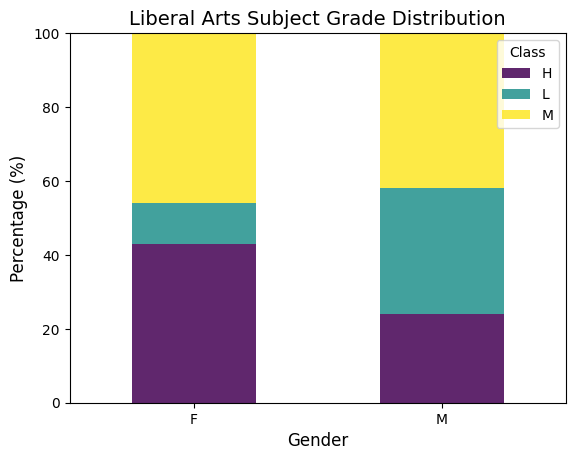

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))

# 누적 막대 그래프 그리기
pivot_liberal_arts_ratio.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.85)

# 그래프 제목 & 라벨 설정
plt.title("Liberal Arts Subject Grade Distribution", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# 범례 추가
plt.legend(title="Class", loc='upper right')

# y축 범위 0~100% 설정
plt.ylim(0, 100)

# x축 라벨 회전
plt.xticks(rotation=0)

# 그래프 출력
plt.show()

In [ ]:
import scipy.stats as stats

# 인문계열 과목에서 성별에 따른 성적 빈도수 계산
contingency_table = pd.crosstab(df[df['Subject_classification'] == 'Liberal Arts']['gender'],
                                df[df['Subject_classification'] == 'Liberal Arts']['Class'])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 결과:")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과:
Chi-Square Test Statistic: 17.270479693275835
p-value: 0.0001777309182540955


- p-value < 0.05 이므로 귀무가설을 기각할 수 있음!
- 즉, 인문계열 과목에서 여학생과 남학생 간 성적 차이가 통계적으로 유의미함!

In [ ]:
# 인문계열 과목에서 성별에 따른 평균 성적 계산
female_mean = liberal_arts_female.mean()
male_mean = liberal_arts_male.mean()

# 결과 출력
print("인문계열 과목 여학생 평균 성적:", female_mean)
print("인문계열 과목 남학생 평균 성적:", male_mean)

인문계열 과목 여학생 평균 성적: 1.6746987951807228
인문계열 과목 남학생 평균 성적: 2.0921052631578947


##### 결론
----
인문계열 과목의 경우, 여학생의 평균 성적이 남학생보다 더 높을 것이다. => **TRUE**

#### 가설 2
----
자연/공학계열 과목의 경우, 남학생의 평균 성적이 여학생보다 더 높을 것이다.

In [ ]:
# 자연/공학계열 과목의 성적 분포
science_df = df[df['Subject_classification'] == 'Science']

pivot_science = science_df.pivot_table(index='gender', columns='Class', aggfunc='size', fill_value=0)

pivot_science_ratio = pivot_science.div(pivot_science.sum(axis=1), axis=0) * 100
pivot_science_ratio = pivot_science_ratio.round(0)
pivot_science_ratio

Class,H,L,M
gender,,,
F,42.0,16.0,41.0
M,20.0,34.0,46.0


<Figure size 800x500 with 0 Axes>

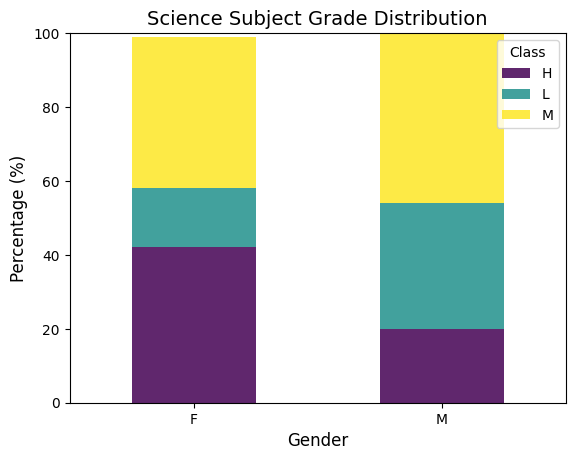

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))

# 누적 막대 그래프 그리기
pivot_science_ratio.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.85)

# 그래프 제목 & 라벨 설정
plt.title("Science Subject Grade Distribution", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# 범례 추가
plt.legend(title="Class", loc='upper right')

# y축 범위 0~100% 설정
plt.ylim(0, 100)

# x축 라벨 회전
plt.xticks(rotation=0)

# 그래프 출력
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats

# 자연/공학계열 과목에서 성별에 따른 성적 빈도수 계산
contingency_table = pd.crosstab(df[df['Subject_classification'] == 'Science']['gender'],
                                df[df['Subject_classification'] == 'Science']['Class'])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 결과:")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과:
Chi-Square Test Statistic: 17.4943061329682
p-value: 0.00015891309674996544


- p-value < 0.05 이므로 귀무가설을 기각할 수 있음!
- 즉, 자연/공학계열 과목에서 남학생과 여학생 간 성적 차이가 통계적으로 유의미함!

In [ ]:
# 자연/공학계열 과목에서 성별에 따른 평균 성적 계산
female_mean = science_female.mean()
male_mean = science_male.mean()

# 결과 출력
print("자연/공학계열 과목 여학생 평균 성적:", female_mean)
print("자연/공학계열 과목 남학생 평균 성적:", male_mean)

자연/공학계열 과목 여학생 평균 성적: 1.7391304347826086
자연/공학계열 과목 남학생 평균 성적: 2.1437908496732025


##### 결론
----
자연/공학계열 과목의 경우, 남학생의 평균 성적이 여학생보다 더 높을 것이다. => **FALSE**

### 3. 교육 단계와 성적

In [ ]:
df['StageID'].value_counts()

,count
StageID,
MiddleSchool,248
lowerlevel,199
HighSchool,33


#### 가설
----
- 똑같은 과목이어도 교육 단계가 올라갈 수록 평균 성적이 더 낮을 것이다. (Lowerlevel < MiddleSchool < HighSchool)
  - 또한, 이러한 경향은 자연/공학계열에서 더욱 두드러지는 경향이 있을 것이다.

In [ ]:
# Pivot Table : 과목별 & 교육 단계별 성적 분포 확인
pivot_df_topic = df.pivot_table(index=['Topic', 'StageID'], columns='Class', aggfunc='size', fill_value=0)
pivot_df_topic

Class                    H   L   M
Topic     StageID                 
Arabic    MiddleSchool   9   6  13
          lowerlevel    10  11  10
Biology   MiddleSchool  16   4  10
Chemistry MiddleSchool  10   8   6
English   HighSchool     3   4   4
          MiddleSchool  13   1  14
          lowerlevel     1   5   0
French    HighSchool     0   0   1
          lowerlevel    20  16  28
Geology   MiddleSchool   6   0  18
History   MiddleSchool   2   2   8
          lowerlevel     2   1   4
IT        HighSchool     2   2   6
          MiddleSchool   2   8  13
          lowerlevel    11  28  23
Math      HighSchool     2   0   0
          MiddleSchool   3   7   7
          lowerlevel     1   0   1
Quran     HighSchool     2   1   1
          MiddleSchool   6   5   7
Science   HighSchool     2   0   2
          MiddleSchool   4   6  10
          lowerlevel    10   4  13
Spanish   HighSchool     0   1   0
          MiddleSchool   5   7  12

In [ ]:
# Pivot Table : 과목별 & 교육 단계별 성적 분포 확인(비율)
pivot_df_topic_ratio = pivot_df_topic.div(pivot_df_topic.sum(axis=1), axis=0) * 100
pivot_df_topic_ratio = pivot_df_topic_ratio.round(0)

pivot_df_topic_ratio

Class                       H      L      M
Topic     StageID                          
Arabic    MiddleSchool   32.0   21.0   46.0
          lowerlevel     32.0   35.0   32.0
Biology   MiddleSchool   53.0   13.0   33.0
Chemistry MiddleSchool   42.0   33.0   25.0
English   HighSchool     27.0   36.0   36.0
          MiddleSchool   46.0    4.0   50.0
          lowerlevel     17.0   83.0    0.0
French    HighSchool      0.0    0.0  100.0
          lowerlevel     31.0   25.0   44.0
Geology   MiddleSchool   25.0    0.0   75.0
History   MiddleSchool   17.0   17.0   67.0
          lowerlevel     29.0   14.0   57.0
IT        HighSchool     20.0   20.0   60.0
          MiddleSchool    9.0   35.0   57.0
          lowerlevel     18.0   45.0   37.0
Math      HighSchool    100.0    0.0    0.0
          MiddleSchool   18.0   41.0   41.0
          lowerlevel     50.0    0.0   50.0
Quran     HighSchool     50.0   25.0   25.0
          MiddleSchool   33.0   28.0   39.0
Science   HighSchool     50.0    0.0   50.0
          MiddleSchool   20.0   30.0   50.0
          lowerlevel     37.0   15.0   48.0
Spanish   HighSchool      0.0  100.0    0.0
          MiddleSchool   21.0   29.0   50.0

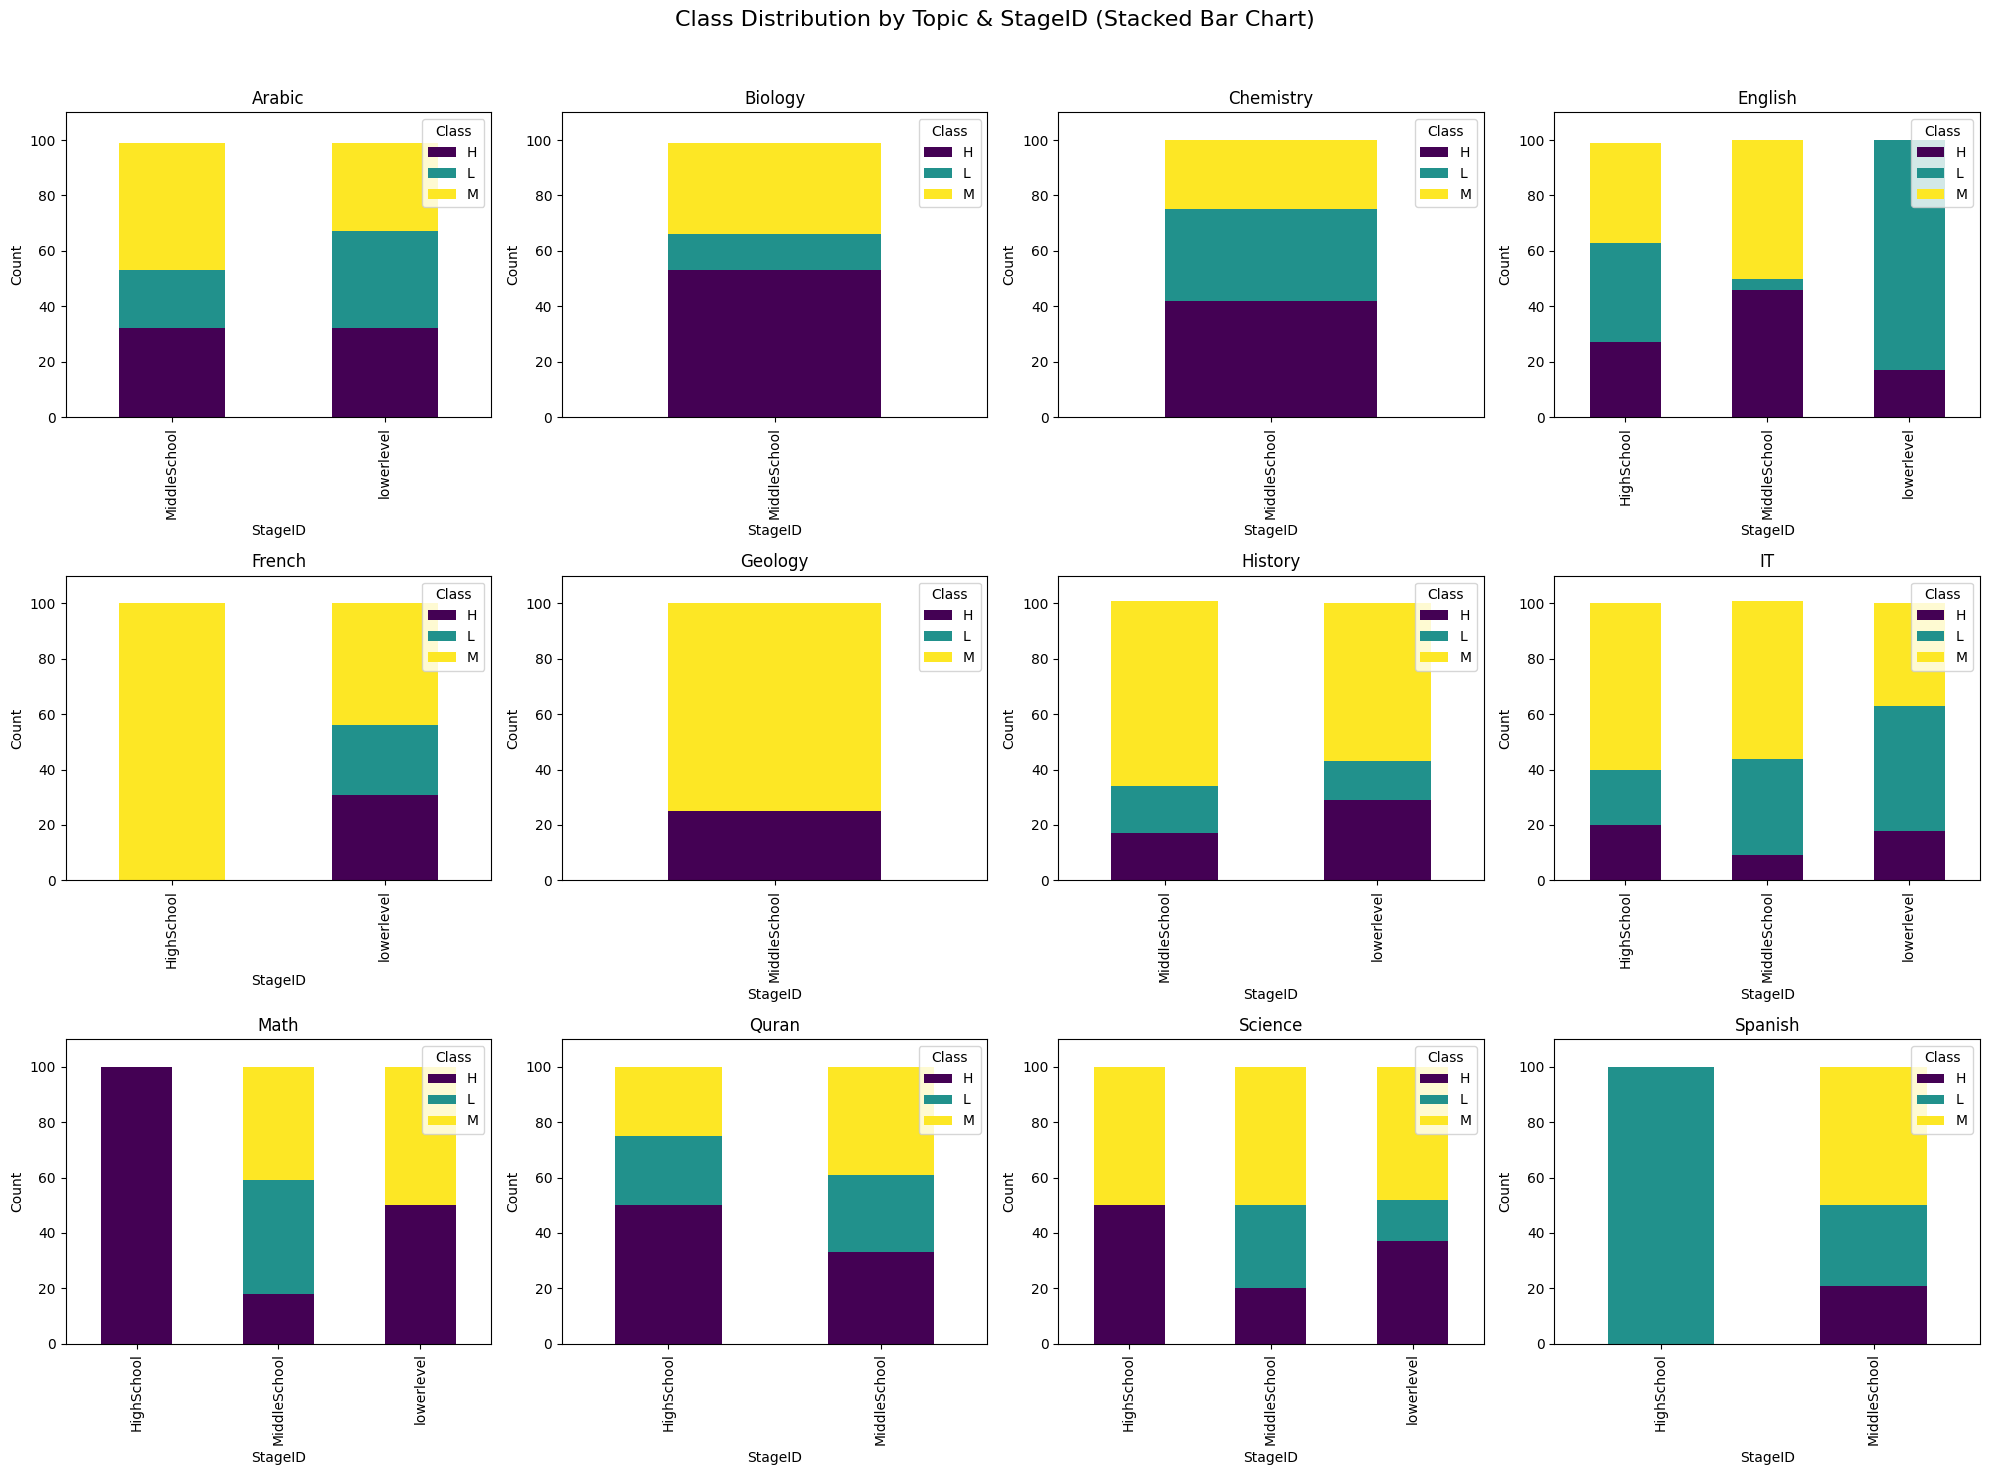

In [ ]:
# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle("Class Distribution by Topic & StageID (Stacked Bar Chart)", fontsize=16)

# 과목별 데이터 가져오기
topics = pivot_df_topic_ratio.index.get_level_values('Topic').unique()

# 서브플롯 순회하며 시각화
for ax, topic in zip(axes.flat, topics):
    pivot_df_topic_ratio.loc[topic].plot(kind='bar', stacked=True,  colormap='viridis', ax=ax, title=topic)
    ax.set_ylabel("Count")
    ax.set_ylim(0, pivot_df_topic_ratio.max().max() * 1.1)  # 최대값 기준으로 Y축 설정
    ax.legend(title="Class", loc='upper right')  # 범례 추가

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- 데이터셋에 한 단계만 있어서 비교가 불가능한 과목은 분석에서 제외
  - 인문계열 과목: Geology
  - 자연/공학계열 과목: Biology, Chemistry

- **교육 단계가 올라갈 수록 'L' 비율이 높아진 과목**
  - 인문계열 과목
    - English(MiddleSchool -> HighSchool)
    - Spanish(MIddleSchool -> HighSchool)
  - 자연/공학계열 과목
    - Math(lowerlevel -> MiddleSchool)
    - Science(lowerlevel -> MiddleSchool)

- **교육 단계가 올라갈 수록 'H' 클래스 비율이 줄어든 과목**
    - 인문계열 과목
      - English(MiddleSchool -> HighSchool)
      - French(lowerlevel -> HighSchool)
      - History(lowerlevel -> MiddleSchool)
      - Spanish(MIddleSchool -> HighSchool)
    - 자연/공학계열 과목
      - IT(lowerlevel -> MiddleSchool)
      - Math(lowerlevel -> MiddleSchool)
      - Science(lowerlevel -> MiddleSchool)

이러한 추세는
 - 인문계열 과목의 경우 English, Spanish, French, History 과목에서 나타났으며
 - 자연/공학계열 과목의 경우 IT, Math, Science 과목에서 나타났다.
----
- 또한 인문계열 과목의 경우 History를 제외한 언어 과목들은 모두 고등학교 성적이 더 떨어진 추세를 보였다.
- 자연/공학계열 과목의 경우 모두 중학교 성적이 떨어진 추세를 보였으며, 오히려 고등학교 성적은 상승하는 추세를 보였다. 고등학교 성적에서 L 클래스 비율이 줄고, H 클래스 비율이 늘었다.

In [ ]:
df['Topic'].unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

In [ ]:
df['StageID'].unique()

array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)

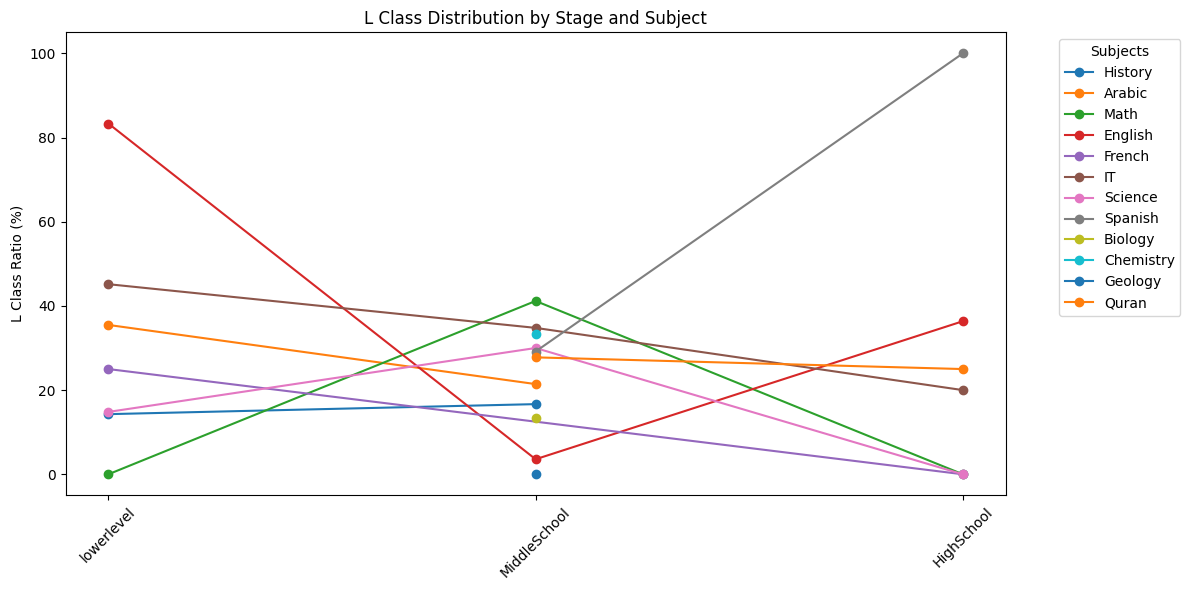

In [ ]:
# StageID 순서를 지정
stage_order = ["lowerlevel", "MiddleSchool", "HighSchool"]

# StageID를 범주형으로 변환하여 순서 지정
pivot_df_topic_ratio["StageID"] = pd.Categorical(pivot_df_topic_ratio["StageID"], categories=stage_order, ordered=True)

# StageID 순서대로 정렬
pivot_df_topic_ratio = pivot_df_topic_ratio.sort_values(by="StageID")

# 시각화
plt.figure(figsize=(12, 6))

# 학년별 L 클래스 비율 시각화 (라인 그래프)
for topic in pivot_df_topic_ratio['Topic'].unique():
    subset = pivot_df_topic_ratio[pivot_df_topic_ratio['Topic'] == topic]
    plt.plot(subset['StageID'], subset['L_ratio'], marker='o', linestyle='-', label=topic)

# 그래프 설정
plt.xticks(rotation=45)
plt.ylabel("L Class Ratio (%)")
plt.title("L Class Distribution by Stage and Subject")
plt.legend(title="Subjects", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import kruskal

# 교육 단계별 성적 비교 (LowerLevel, MiddleSchool, HighSchool)
lowerlevel_scores = df[df['StageID'] == 'lowerlevel']['Class_numeric'].dropna()
middleschool_scores = df[df['StageID'] == 'MiddleSchool']['Class_numeric'].dropna()
highschool_scores = df[df['StageID'] == 'HighSchool']['Class_numeric'].dropna()

# 샘플 크기 확인
print("LowerLevel 학생 수:", len(lowerlevel_scores))
print("MiddleSchool 학생 수:", len(middleschool_scores))
print("HighSchool 학생 수:", len(highschool_scores))

# Kruskal-Wallis 검정 실행
kruskal_result = kruskal(lowerlevel_scores, middleschool_scores, highschool_scores)

# 결과 출력
print("크루스칼 왈리스 검정 결과")
print("Kruskal-Wallis H test statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)

LowerLevel 학생 수: 199
MiddleSchool 학생 수: 248
HighSchool 학생 수: 33
크루스칼 왈리스 검정 결과
Kruskal-Wallis H test statistic: 3.9323875874533782
p-value: 0.1399886692290076


In [ ]:
import pandas as pd
import scipy.stats as stats

# StageID (학년)와 Class (성적) 간의 빈도수 테이블 생성
contingency_table = pd.crosstab(df["StageID"], df["Class"])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
chi2_stat, p, dof, expected

# 카이제곱 검정 결과 출력 (지정된 형식)
print("카이제곱 검정 결과")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과
Chi-Square Test Statistic: 7.098963112154691
p-value: 0.13074998727949977


- 귀무가설(H₀):
"교육 단계(LowerLevel, MiddleSchool, HighSchool) 간 평균 성적에는 유의미한 차이가 없다."
- 대립가설(H₁):
"교육 단계가 올라갈수록 평균 성적이 낮아질 것이다."
- p-value = 0.1307 (> 0.05)
- 즉, 교육 단계별 성적 차이가 유의미하지 않음.
- 따라서 "교육 단계가 올라갈수록 평균 성적이 낮아질 것이다"라는 가설을 통계적으로 뒷받침할 수 없음.

##### 결론
----
- 똑같은 과목이어도 교육 단계가 올라갈 수록 평균 성적이 더 낮을 것이다. (Lowerlevel < MiddleSchool < HighSchool) => **데이터를 시각화하였을 때 TRUE인 것으로 보이나, 통계적으로 유의미하지 않다.**
  - 총 12과목 중 비교 분석이 불가능한 3과목을 제외하였을 때, 9과목 중 7과목에서 교육 단계가 올라갈 수록 평균 성적이 낮아지는 추세를 보였다.
- 또한, 이러한 경향은 자연/공학계열에서 더욱 두드러지는 경향이 있을 것이다. => **데이터를 시각화하였을 때 FALSE인 것으로 보이나, 통계적으로 유의미하지 않다.**
  - 이러한 추세를 보이는 과목의 수는 인문계열에서 더 많다.
  - 자연/공학계열 과목은 중학교 성적이 떨어지는 것에 비해, 인문계열 과목은 고등학교 성적이 떨어지는 추세를 보이기 때문에 교육 단계가 올라갈 수록 평균 성적이 더 낮아지는 추세가 자연/공학계열에서 두드러진다는 것은 거짓이다.

### 4. 부모와 성적

In [ ]:
df['Relation'].value_counts()

,count
Relation,
Father,283
Mum,197


In [ ]:
# 부모 유형별 설문 응답 개수 계산
df_relation = df.groupby('Relation')['ParentAnsweringSurvey'].value_counts().to_frame(name='count')

# 각 Relation 그룹 내에서 전체 합을 구한 후 비율 계산
df_relation['ratio'] = df_relation.groupby('Relation')['count'].transform(lambda x: (x / x.sum()) * 100)
df_relation

count      ratio
Relation ParentAnsweringSurvey                  
Father   No                       143  50.530035
         Yes                      140  49.469965
Mum      Yes                      130  65.989848
         No                        67  34.010152

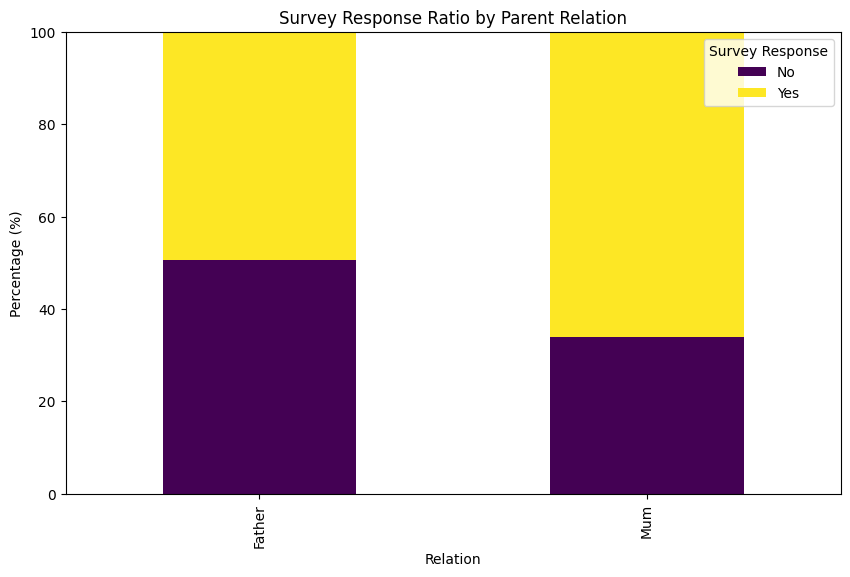

In [ ]:
# 시각화
df_relation_pivot = df_relation.pivot_table(index='Relation', columns='ParentAnsweringSurvey', values='ratio', fill_value=0)

# 바 차트 그리기 (누적형 바 그래프)
df_relation_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# 그래프 설정
plt.title("Survey Response Ratio by Parent Relation")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.legend(title="Survey Response", loc='upper right')

# 그래프 출력
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# 부모 유형별 설문조사 응답 개수 계산
df_relation = df.groupby('Relation')['ParentAnsweringSurvey'].value_counts().unstack(fill_value=0)

# 'Yes'와 'No' 응답 수 가져오기
mum_yes = df_relation.loc['Mum', 'Yes']
mum_no = df_relation.loc['Mum', 'No']
father_yes = df_relation.loc['Father', 'Yes']
father_no = df_relation.loc['Father', 'No']

# 교차표 생성
contingency_table = pd.DataFrame({
    "Yes": [mum_yes, father_yes],
    "No": [mum_no, father_no]
}, index=["Mum", "Father"])

# 카이제곱 검정 실행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 결과:")
print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)

카이제곱 검정 결과:
Chi-Square Test Statistic: 12.217726609217344
p-value: 0.00047337577895449097


- p-value < 0.05 이므로 귀무가설을 기각할 수 있음!
- 즉, 부모 유형(어머니 vs 아버지)에 따라 설문조사 응답률 차이가 통계적으로 유의미함!

- 아이를 케어하는 아버지는 설문조사 응답 / 미응답 비율이 비슷한 양상을 보임.
- 아이를 케어하는 어머니는 설문조사 미응답 비율에 비해 응답 비율이 훨씬 높은 양상을 보임.
  - 아이를 케어하는 어머니가 아이의 교육에 더 관심이 있는 편이라고 할 수 있음.

In [ ]:
# 설문조사 응답별 학교 만족도 비율 계산
df_satisfaction = df.groupby('ParentAnsweringSurvey')['ParentschoolSatisfaction'].value_counts()
df_satisfaction

ParentAnsweringSurvey  ParentschoolSatisfaction
No                     Bad                         145
                       Good                         65
Yes                    Good                        227
                       Bad                          43
Name: count, dtype: int64

In [ ]:
# 설문조사 응답별 학교 만족도 개수 계산 (DataFrame 변환)
df_satisfaction = df.groupby('ParentAnsweringSurvey')['ParentschoolSatisfaction'].value_counts().to_frame(name='count')

# 각 ParentAnsweringSurvey 그룹 내에서 비율 계산
df_satisfaction['ratio'] = df_satisfaction.groupby('ParentAnsweringSurvey')['count'].transform(lambda x: (x / x.sum()) * 100)
df_satisfaction

count      ratio
ParentAnsweringSurvey ParentschoolSatisfaction                  
No                    Bad                         145  69.047619
                      Good                         65  30.952381
Yes                   Good                        227  84.074074
                      Bad                          43  15.925926

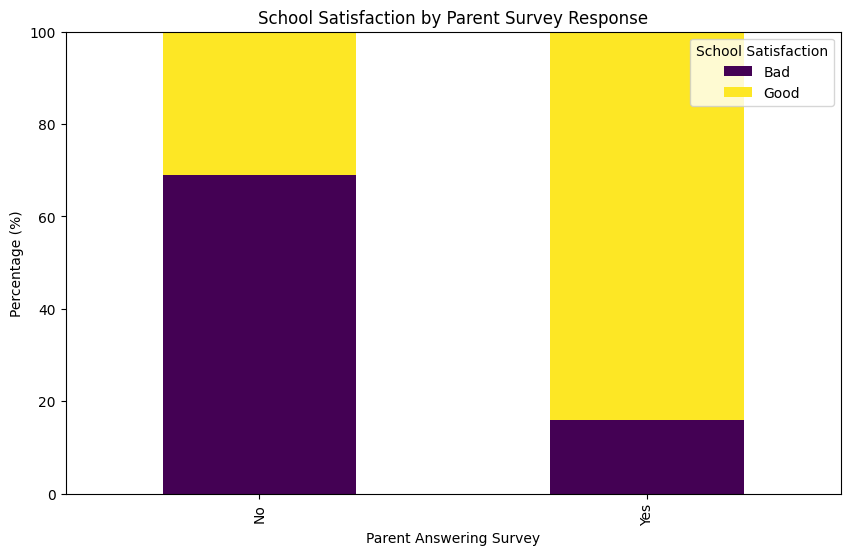

In [ ]:
# 시각화
df_satisfaction_pivot = df_satisfaction.pivot_table(index='ParentAnsweringSurvey',
                                                    columns='ParentschoolSatisfaction',
                                                    values='ratio',
                                                    fill_value=0)

# 누적형 바 그래프 시각화
fig, ax = plt.subplots(figsize=(10, 6))
df_satisfaction_pivot.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# 그래프 설정
plt.title("School Satisfaction by Parent Survey Response")
plt.xlabel("Parent Answering Survey")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.legend(title="School Satisfaction", loc='upper right')

# 그래프 출력
plt.show()

- 부모가 설문조사에 미응답한 경우, 학교에 불만족하는 비율이 높았음.
- 부모가 설문조사에 응답한 경우, 학교에 만족하는 비율이 높았음.
----
- 자식을 케어하는 부모가 자식의 교육에 관심이 많을 수록 학교 설문조사에 응답할 확률이 높기 때문에, 그런 부모들이 대체로 만족하는 학교라면 교육 인프라나 커리큘럼 등이 매우 양질일 확률이 높음.

#### 가설
----
- (아이의 교육에 더 관심이 많은) 어머니에게 케어받는 아이들의 평균 성적이 아버지에게 케어받는 아이들보다 더 높을 것이다.

In [ ]:
df.groupby('Relation')['Class'].value_counts()

Relation  Class
Father    M        137
          L        104
          H         42
Mum       H        100
          M         74
          L         23
Name: count, dtype: int64

In [ ]:
# 부모 유형별 Class 개수를 피벗 테이블로 변환
df_relation_pivot = df.groupby('Relation')['Class'].value_counts().unstack(fill_value=0)

# 각 Relation 그룹 내에서 비율 계산 (각 행을 100%로 정규화)
df_relation_pivot = df_relation_pivot.div(df_relation_pivot.sum(axis=1), axis=0) * 100
df_relation_pivot = df_relation_pivot.round(0)
df_relation_pivot

Class,H,L,M
Relation,,,
Father,15.0,37.0,48.0
Mum,51.0,12.0,38.0


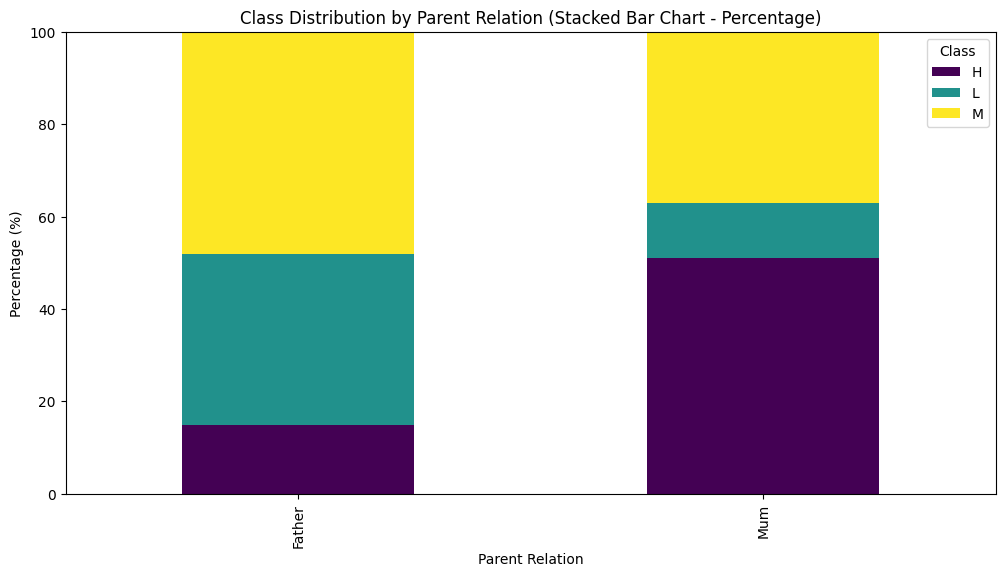

In [ ]:
# 시각화
fig, ax = plt.subplots(figsize=(12, 6))
df_relation_pivot.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

plt.title("Class Distribution by Parent Relation (Stacked Bar Chart - Percentage)")
plt.xlabel("Parent Relation")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)  # 비율이므로 Y축을 100%로 설정
plt.legend(title="Class", loc='upper right')
plt.show()

- 어머니에게 케어받는 아이들한테서 'H' 클래스 비율이 더 높게 나타났다.
- 아버지에게 케어받는 아이들한테서 'L' 클래스 비율이 더 낮게 나타났다.

In [ ]:
from scipy.stats import mannwhitneyu

# 부모 유형별 성적 비교
mum_scores = df[df['Relation'] == 'Mum']['Class_numeric'].dropna()
father_scores = df[df['Relation'] == 'Father']['Class_numeric'].dropna()

# 샘플 크기 확인
print("어머니에게 케어받는 학생 수:", len(mum_scores))
print("아버지에게 케어받는 학생 수:", len(father_scores))

# Mann-Whitney U 검정 실행
mann_whitney_result = mannwhitneyu(mum_scores, father_scores, alternative='two-sided')

# 결과 출력
print("Mann-Whitney U test statistic:", mann_whitney_result.statistic)
print("p-value:", mann_whitney_result.pvalue)

어머니에게 케어받는 학생 수: 197
아버지에게 케어받는 학생 수: 283
Mann-Whitney U test statistic: 15590.0
p-value: 1.2813672556011427e-18


- p-value < 0.05 이므로 귀무가설을 기각할 수 있음!
- 즉, 어머니 vs 아버지 케어 여부에 따른 학생 성적 차이가 통계적으로 유의미함!
- 부모 유형이 학생 성적에 영향을 미친다고 볼 수 있음.

In [ ]:
# 높은 등급 = 1등급이기 때문에 숫자가 낮을 수록 좋다.
print("어머니 케어 학생 평균 성적:", mum_scores.mean())
print("아버지 케어 학생 평균 성적:", father_scores.mean())

어머니 케어 학생 평균 성적: 1.6091370558375635
아버지 케어 학생 평균 성적: 2.2190812720848054


##### 결론
----
- 어머니에게 케어받는 아이들의 평균 성적이 아버지에게 케어받는 아이들보다 더 높을 것이다. => **TRUE**

### 추가) 성적은 좋지만 학습 참여도가 수상하게 낮은 것 같은 학생들 찾기

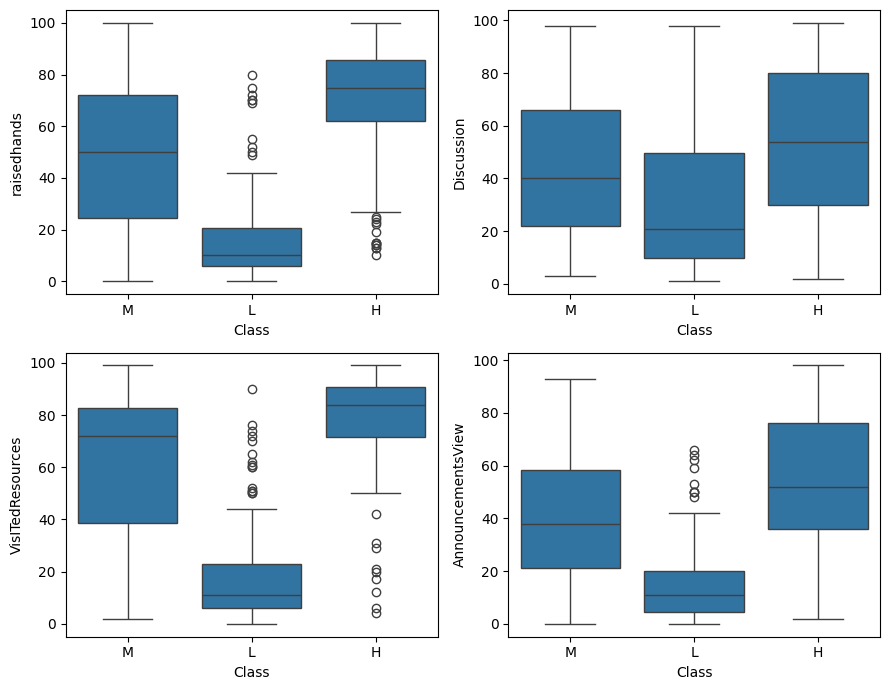

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

fig, axes = plt.subplots(2, 2, figsize=(9, 7))

sns.boxplot(x='Class', y='raisedhands', data=df, ax=axes[0, 0])
sns.boxplot(x='Class', y='Discussion', data=df, ax=axes[0, 1])
sns.boxplot(x='Class', y='VisITedResources', data=df, ax=axes[1, 0])
sns.boxplot(x='Class', y='AnnouncementsView', data=df, ax=axes[1, 1])

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
# # class 'H'(1등급)지만 VisITedResources에서 수상하게 횟수가 적은 학생들 찾기

# IQR 계산
Q1 = df[df['Class'] == 'H']['VisITedResources'].quantile(0.25)
Q3 = df[df['Class'] == 'H']['VisITedResources'].quantile(0.75)
IQR = Q3 - Q1

# Class = 'H'인 경우에서만 IQR 기준으로 이상치 필터링
df_outliers_VisITedResources = df[
    (df['Class'] == 'H') &
    (df['VisITedResources'] < (Q1 - 1.5 * IQR))  # 이상치 기준 적용
]

df_outliers_VisITedResources

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,location,Arab,War,Subject_classification,Class_numeric
47,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,70,...,90,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
86,M,SaudiArabia,SaudiArabia,lowerlevel,G-02,B,IT,F,Father,70,...,50,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Science,3
117,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Mum,25,...,17,No,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Science,3
178,F,lebanon,lebanon,lowerlevel,G-02,B,French,S,Mum,80,...,13,Yes,Bad,Under-7,H,MIDDLE EAST,Arab world,During the war,Liberal Arts,3
250,M,KW,KuwaIT,lowerlevel,G-04,A,Math,S,Father,15,...,40,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Science,3
255,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,10,...,40,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
273,M,Jordan,Jordan,MiddleSchool,G-06,A,English,S,Father,22,...,26,No,Bad,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
276,M,Palestine,Jordan,MiddleSchool,G-06,A,English,F,Mum,72,...,26,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,During the war,Liberal Arts,3
277,M,Palestine,Jordan,MiddleSchool,G-06,A,English,S,Mum,92,...,27,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,During the war,Liberal Arts,3


In [ ]:
# class 'H'(1등급)지만 raisedhands에서 수상하게 횟수가 적은 학생들 찾기

# IQR 계산
Q1 = df[df['Class'] == 'H']['raisedhands'].quantile(0.25)
Q3 = df[df['Class'] == 'H']['raisedhands'].quantile(0.75)
IQR = Q3 - Q1

# Class = 'H'인 경우에서만 IQR 기준으로 이상치 필터링
df_outliers_raisedhands = df[
    (df['Class'] == 'H') &
    (df['raisedhands'] < (Q1 - 1.5 * IQR))  # 이상치 기준 적용
]

df_outliers_raisedhands

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,location,Arab,War,Subject_classification,Class_numeric
48,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,13,...,88,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
96,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,14,...,75,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Science,3
117,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Mum,25,...,17,No,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Science,3
200,M,KW,KuwaIT,MiddleSchool,G-08,B,Arabic,S,Mum,15,...,83,Yes,Bad,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
250,M,KW,KuwaIT,lowerlevel,G-04,A,Math,S,Father,15,...,40,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Science,3
255,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,10,...,40,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
273,M,Jordan,Jordan,MiddleSchool,G-06,A,English,S,Father,22,...,26,No,Bad,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
344,F,Jordan,Jordan,lowerlevel,G-02,B,French,F,Mum,14,...,14,No,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
345,F,Jordan,Jordan,lowerlevel,G-02,B,French,F,Mum,13,...,30,No,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
346,F,Jordan,Jordan,lowerlevel,G-02,B,French,S,Mum,24,...,14,No,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3


In [ ]:
# 두 데이터프레임의 공통 학생 찾기 (교집합)
df_outliers_common = df_outliers_VisITedResources.merge(df_outliers_raisedhands, how='inner')
df_outliers_common

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,location,Arab,War,Subject_classification,Class_numeric
0,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Mum,25,...,17,No,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Science,3
1,M,KW,KuwaIT,lowerlevel,G-04,A,Math,S,Father,15,...,40,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Science,3
2,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,10,...,40,Yes,Good,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3
3,M,Jordan,Jordan,MiddleSchool,G-06,A,English,S,Father,22,...,26,No,Bad,Under-7,H,MIDDLE EAST,Arab world,peaceful,Liberal Arts,3


In [ ]:
df_outliers_common.T  # 데이터프레임 전치 (Transpose)

,0,1,2,3
gender,F,M,M,M
NationalITy,KW,KW,KW,Jordan
PlaceofBirth,KuwaIT,KuwaIT,KuwaIT,Jordan
StageID,lowerlevel,lowerlevel,lowerlevel,MiddleSchool
GradeID,G-02,G-04,G-04,G-06
SectionID,C,A,A,A
Topic,IT,Math,History,English
Semester,F,S,S,S
Relation,Mum,Father,Father,Father
raisedhands,25,15,10,22


- location : 국가별 위치 구분(현재 4개의 데이터 모두 중동)
- Arab : 아랍권 / 비아랍권 문화권 구분(현재 4개의 데이터 모두 아랍권)
- War : 전쟁 중 / 평화로운 국가 구분(현재 4개의 데이터 모두 평화로움)
- Subject_classification : 문/이과 구분(참고만 해주시고 정확히 무슨 과목인지는 위의 Topic으로 보시면 됨)
- Class_numeric : L / M / H 성적 구분을 숫자로 하기 위한 임의의 칼럼(이건 무시하시고 Class로 보시면 됩니다)